<a href="https://colab.research.google.com/github/AdityaTheJaat/PlacementPredictionModel/blob/main/Placement_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd

In [26]:
df = pd.read_csv('/content/placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [27]:
df.shape

(100, 4)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [29]:
df = df.iloc[:, 1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [30]:
import matplotlib.pyplot as plt

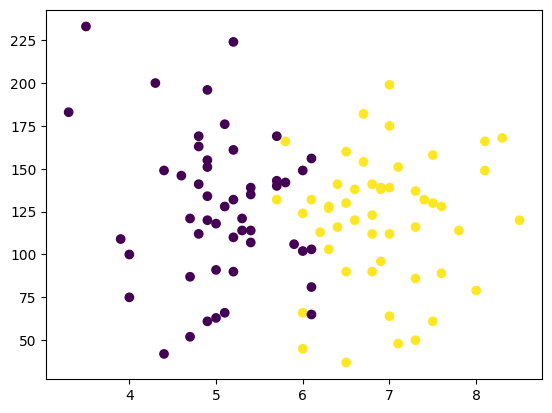

In [31]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [32]:
X = df.iloc[:, 0:2]
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [33]:
Y = df.iloc[:, -1]
print(Y.shape)
Y.head()

(100,)


0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
Y_train

51    0
35    1
92    0
4     0
95    0
     ..
82    1
33    0
98    1
43    1
97    1
Name: placement, Length: 90, dtype: int64

In [38]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

# Model training
clf.fit(X_train, Y_train)

LogisticRegression()

In [42]:
Y_pred = clf.predict(X_test)

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0])

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.9

<Axes: >

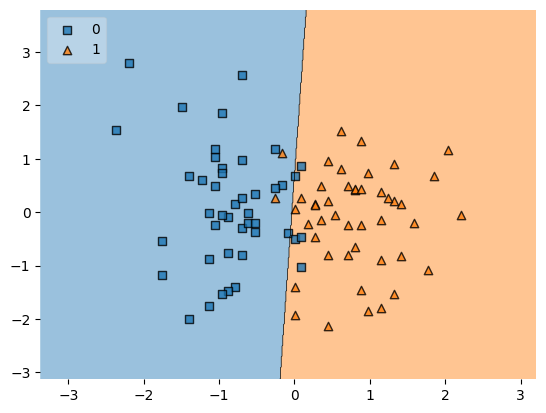

In [50]:
# Decision boundary
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

In [52]:
import pickle
pickle.dump(clf, open('model.pkl', 'wb'))